# __ANALISI DEL TASSO DI OCCUPAZIONE GIOVANILE IN ITALIA NEGLI ANNI 2010 - 2019__

**Esercizio laboratorio per i punti aggiuntivi all'esame di Alice Ilacqua, Laura Sorrentino e Colombo Rebecca**

Il dataset fa riferimento al tasso di occupazione giovanile italiana negli anni 2010 - 2019 raggruppata per età 15-24 e 25-34 anni ; abbiamo deciso di analizzare tale datasat in quanto ci ha interessato l'argomento e abbiamo deciso di approfondirlo utilizzando le competenze acquisite durante le lezioni e durante i vari esercizi svolti

Il dataset utilizzato si può trovare sul sito ISTAT cliccando il seguente link: http://dati-giovani.istat.it/ PERCORSO DA SEGUIRE PER VISUALIZZARE TABELLA: Lavoro--Occupazione--Tasso di occupazione--Popolazione di 15-34 anni - reg.-- selezionare periodo 2010 - 2019 togliendo i trimestri --selezionare fasce età 15-24 e 25-34)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
img = mpimg.imread("C:/Users/lalla/Desktop/UNIMI/OIP.jpg")

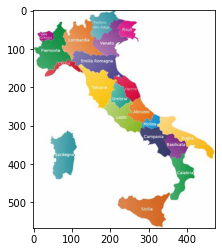

In [3]:
imgplot = plt.imshow(img)

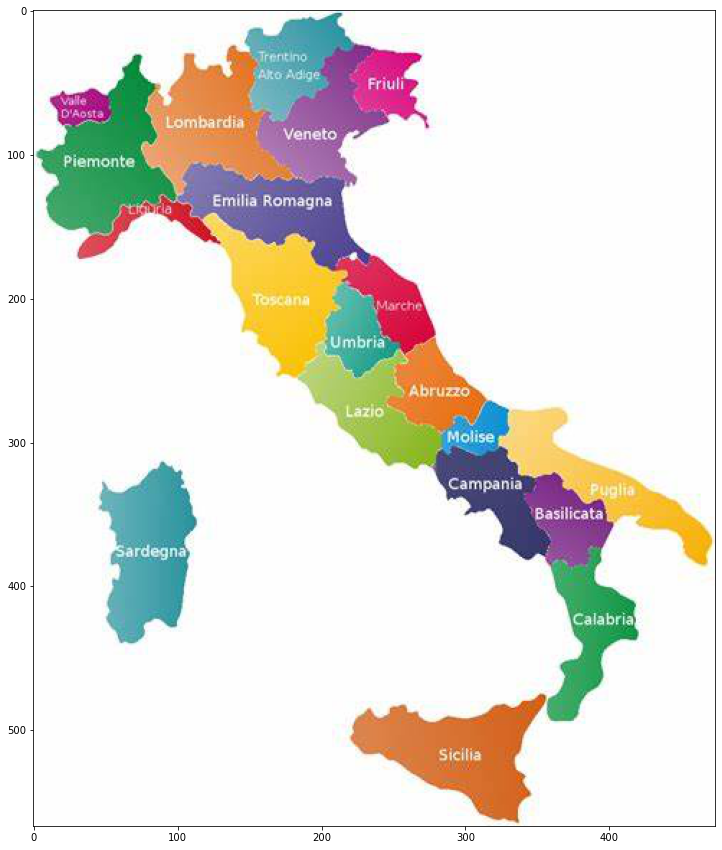

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(img); plt.show()

In [5]:
import numpy as np
import pandas as pd

In [6]:
tabella_iniziale_occ = pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Tasso occupazione.csv")
tabella_iniziale_occ

,ITTER107,Territorio,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2010,2010,52.110,NaN,NaN
1,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2011,2011,54.017,NaN,NaN
2,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2012,2012,52.224,NaN,NaN
3,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2013,2013,42.618,NaN,NaN
4,ITC1,Piemonte,1,maschi,Y15-24,15-24 anni,2014,2014,39.999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1315,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2015,2015,28.447,NaN,NaN
1316,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2016,2016,29.167,NaN,NaN
1317,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2017,2017,26.733,NaN,NaN
1318,ITE2,Umbria,2,femmine,Y25-34,25-34 anni,2018,2018,24.818,NaN,NaN


In [7]:
tabella_iniziale_occ.isnull().sum()

ITTER107                0
Territorio              0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1320
Flags                1320
dtype: int64

 **Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**

In [8]:
tasso_occupazione_giovanile= pd.DataFrame(data=tabella_iniziale_occ, columns =['Territorio', 'SEXISTAT1', 'Sesso', 'Classe di età', 'Seleziona periodo', 'Value' ])
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Value
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


**La tabella non ci evidenzia la fascia di età 25-34 ma in realtà i valori ci sono (vedi sotto):**

In [9]:
Età= tasso_occupazione_giovanile.groupby(["Classe di età"]).count().reset_index()
Età["Classe di età"]

0    15-24 anni
1    25-34 anni
Name: Classe di età, dtype: object

In [10]:
#rinominiamo alcuni nomi di colonne per facilitarci
tasso_occupazione_giovanile.rename(columns={"Value": "Valori", "Seleziona periodo":"Anni", "Classe di età":"Età"},inplace=True) 
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


Il primo passaggio da fare è verificare se nel dataset sono presenti tutte le regioni utilizzando la funzione "groupby"

In [11]:
Territori=tasso_occupazione_giovanile.groupby(["Territorio"]).count().reset_index()
Territori["Territorio"]

0                                Abruzzo
1                             Basilicata
2                               Calabria
3                               Campania
4                         Emilia-Romagna
5                  Friuli-Venezia Giulia
6                                  Lazio
7                                Liguria
8                              Lombardia
9                                 Marche
10                                Molise
11                              Piemonte
12    Provincia Autonoma Bolzano / Bozen
13             Provincia Autonoma Trento
14                                Puglia
15                              Sardegna
16                               Sicilia
17                               Toscana
18        Trentino Alto Adige / Südtirol
19                                Umbria
20        Valle d'Aosta / Vallée d'Aoste
21                                Veneto
Name: Territorio, dtype: object


Come si può notare, le due Province di Bolzano e Trento rientrano nella regione del Trentino Alto Adige quindi le cancelliamo dal dataset:

In [12]:
#TOG="tasso occupazione giovanile"
TOG_regioni=tasso_occupazione_giovanile[~tasso_occupazione_giovanile.Territorio.str.contains("Provincia")]
TOG_regioni

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


**Il mio dataset adesso è TOG_regioni quindi poi posso creare altri dataset partendo da questo**

In [13]:
primo_data=TOG_regioni[['Territorio', 'Sesso', 'Valori', 'Età']]
primo_data

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,52.110,15-24 anni
1,Piemonte,maschi,54.017,15-24 anni
2,Piemonte,maschi,52.224,15-24 anni
3,Piemonte,maschi,42.618,15-24 anni
4,Piemonte,maschi,39.999,15-24 anni
...,...,...,...,...
1315,Umbria,femmine,28.447,25-34 anni
1316,Umbria,femmine,29.167,25-34 anni
1317,Umbria,femmine,26.733,25-34 anni
1318,Umbria,femmine,24.818,25-34 anni


In [14]:
sesso_femmine=primo_data[primo_data.Sesso == "femmine"] 
sesso_femmine

,Territorio,Sesso,Valori,Età
10,Piemonte,femmine,40.195,15-24 anni
11,Piemonte,femmine,39.147,15-24 anni
12,Piemonte,femmine,36.464,15-24 anni
13,Piemonte,femmine,28.944,15-24 anni
14,Piemonte,femmine,30.227,15-24 anni
...,...,...,...,...
1315,Umbria,femmine,28.447,25-34 anni
1316,Umbria,femmine,29.167,25-34 anni
1317,Umbria,femmine,26.733,25-34 anni
1318,Umbria,femmine,24.818,25-34 anni


In [15]:
sesso_maschi=primo_data[primo_data.Sesso == "maschi"] 
sesso_maschi

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,52.110,15-24 anni
1,Piemonte,maschi,54.017,15-24 anni
2,Piemonte,maschi,52.224,15-24 anni
3,Piemonte,maschi,42.618,15-24 anni
4,Piemonte,maschi,39.999,15-24 anni
...,...,...,...,...
1255,Campania,maschi,189.280,25-34 anni
1256,Campania,maschi,188.216,25-34 anni
1257,Campania,maschi,197.880,25-34 anni
1258,Campania,maschi,191.159,25-34 anni


In [16]:
totale=primo_data[primo_data.Sesso == "totale"]
totale

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,92.305,15-24 anni
21,Piemonte,totale,93.164,15-24 anni
22,Piemonte,totale,88.688,15-24 anni
23,Piemonte,totale,71.562,15-24 anni
24,Piemonte,totale,70.225,15-24 anni
...,...,...,...,...
1305,Liguria,totale,95.891,25-34 anni
1306,Liguria,totale,92.441,25-34 anni
1307,Liguria,totale,94.548,25-34 anni
1308,Liguria,totale,98.542,25-34 anni


In [17]:
provapdef=totale.groupby(["Territorio", "Età"]).sum()
provapdef

Valori
Territorio                     Età                 
Abruzzo                        15-24 anni   205.276
                               25-34 anni   946.200
Basilicata                     15-24 anni    76.077
                               25-34 anni   346.037
Calabria                       15-24 anni   233.115
                               25-34 anni  1028.428
Campania                       15-24 anni   798.937
                               25-34 anni  3031.088
Emilia-Romagna                 15-24 anni   858.762
                               25-34 anni  3554.942
Friuli-Venezia Giulia          15-24 anni   215.318
                               25-34 anni   900.229
Lazio                          15-24 anni   838.096
                               25-34 anni  4245.287
Liguria                        15-24 anni   224.958
                               25-34 anni  1012.250
Lombardia                      15-24 anni  2036.398
                               25-34 anni  8513.566
Marche                         15-24 anni   288.988
                               25-34 anni  1206.264
Molise                         15-24 anni    41.283
                               25-34 anni   190.576
Piemonte                       15-24 anni   793.282
                               25-34 anni  3360.170
Puglia                         15-24 anni   633.220
                               25-34 anni  2406.065
Sardegna                       15-24 anni   223.723
                               25-34 anni  1009.841
Sicilia                        15-24 anni   662.605
                               25-34 anni  2579.627
Toscana                        15-24 anni   654.748
                               25-34 anni  2796.418
Trentino Alto Adige / Südtirol 15-24 anni   338.488
                               25-34 anni   946.247
Umbria                         15-24 anni   154.184
                               25-34 anni   680.970
Valle d'Aosta / Vallée d'Aoste 15-24 anni    26.244
                               25-34 anni   102.095
Veneto                         15-24 anni  1099.820
                               25-34 anni  4014.560


Sulla base del dataset provapdef contenente solo i valori totali non suddivisi tra "maschi" e "femmine" andiamo a calcolare alcuni dati statistici che potranno tornarci utili successivamente per l'analisi

In [18]:
Datistat = np.array(totale['Valori'])
print(Datistat)

[ 92.305  93.164  88.688  71.562  70.225  70.483  68.945  75.233  80.328
  82.349   3.082   2.705   2.914   2.513   2.233   2.519   2.502   2.463
   2.643   2.67   27.534  27.416  26.923  18.956  19.195  19.604  20.793
  21.364  21.012  22.161 223.118 215.549 207.712 194.263 187.38  177.93
 186.144 197.4   216.685 230.217  35.203  35.36   36.13   32.384  31.824
  29.66   31.473  33.001  35.549  37.904  25.822  23.623  19.145  20.959
  21.018  19.608  20.655  20.973  20.461  23.054  91.704  88.425  87.152
  72.344  72.155  77.612  88.166  91.272  92.158  97.774  70.455  68.999
  67.905  65.508  64.229  61.09   58.767  66.123  64.537  67.135  19.831
  19.153  17.005  14.813  12.771  13.903  13.846  14.989  13.777  14.096
  35.961  29.745  31.083  25.668  24.548  27.053  28.277  30.335  28.451
  27.867 101.963  94.395  85.229  75.711  69.21   76.572  78.139  81.465
  88.492  86.92   88.083  77.278  73.404  59.092  51.001  56.241  60.321
  53.14   57.194  57.466   8.178   8.63    7.489   5

In [19]:
#per vedere dati statistici posso utilizzare
print("Media giovani occupati: ", Datistat.mean())
print("Deviazione Standard: ", Datistat.std())
print("Valore minimo: ", Datistat.min())
print("Valore massimo: ", Datistat.max())
print("25 percentile: ", np.percentile(Datistat, 25))
print("Mediana Valori: ", np.median(Datistat))
print("75 percentile: ", np.percentile(Datistat, 75))

Media giovani occupati:  133.185955
Deviazione Standard:  163.93264362015572
Valore minimo:  2.233
Valore massimo:  956.3530000000001
25 percentile:  25.3335
Mediana Valori:  83.4715
75 percentile:  151.2525


**Importiamo matplotlib e seaborn per creare grafici sulla base dei nostri dati:**

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set(context='notebook', style='darkgrid', font='sans-serif', font_scale = 1)
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt

Text(0.5, 0, 'Valori')

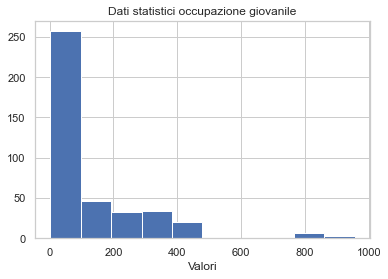

In [21]:
seaborn.set_style(style="whitegrid")
plt.hist(Datistat)
plt.title('Dati statistici occupazione giovanile') #titolo del grafico
plt.xlabel('Valori') #nome asse x

**COMMENTO GRAFICO**: *Il grafico sopra riportato mostra l'andamento dell'occupazione giovanile (presi i valori totali) distribuita nei diversi anni (dal 2010 al 2019); come si può notare c'è stata un'alta occupazione negli anni 2010 e 2011 e poi è andata calando fino ad avere una leggera ripresa nel 2018 e 2019*

In [22]:
sns.set_theme(style="darkgrid")

In [23]:
fig, ax = plt.figure(figsize=(10,2))
fig=sns.barplot(data=primo_data, x="Valori", y="Territorio", 
                order=primo_data.sort_values
('Valori',
 ascending = False).Territorio, palette="ch:.25", ax=ax)

TypeError: cannot unpack non-iterable Figure object

<Figure size 720x144 with 0 Axes>

In [ ]:
fig = plt.figure(figsize=(10,2))
sns.catplot(data=primo_data, x="Valori", y="Territorio", kind="bar", palette="ch:.25")
sorted(["Valori"], key=str)
"Valori".sort

***COMMENTO GRAFICO***: *Il grafico rappresenta in generale l'occupazione per regione; ad esempio il Trentino Alto Adige, la Valle d'Aosta, il Veneto e la Lombardia presentano i valori di occupazione a livello giovanile più alti mentre regioni come la Sicilia hanno un occupazione giovanile nettamente inferiore (in fondo al nostro lavoro abbiamo sviluppato un'analisi in merito a tale regione)*

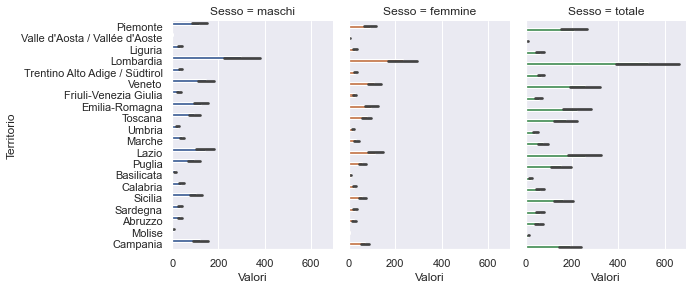

In [24]:
sns.catplot(data=primo_data, x="Valori", y="Territorio", hue="Sesso", col="Sesso",kind="bar",height=4, aspect=.8)

***COMMENTO GRAFICO***: *Questo grafico è più dettagliato rispetto al precedente poichè analizza l'occupazione in funzione del sesso*

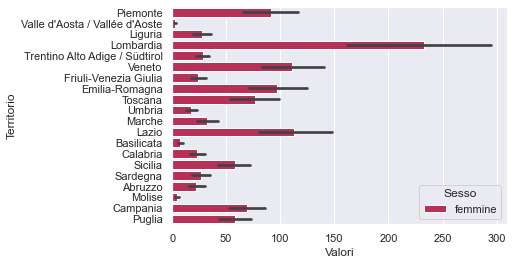

In [25]:
grafico_sesso_femmine=sns.barplot(data=sesso_femmine, x="Valori", y="Territorio", hue="Sesso",  palette="rocket")
grafico_sesso_femmine

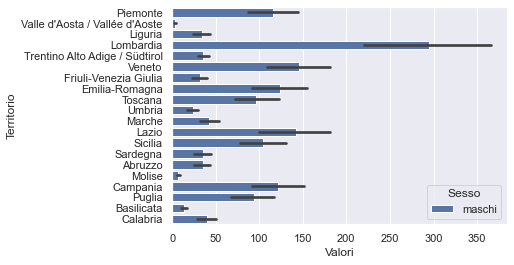

In [28]:
grafico_sesso_maschi=sns.barplot(data=sesso_maschi, x="Valori", y="Territorio", hue="Sesso")
grafico_sesso_maschi

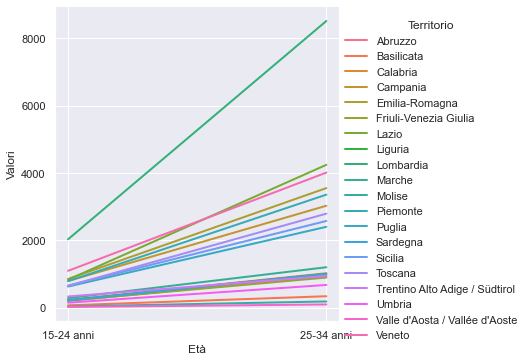

In [29]:
sns.color_palette()
sns.relplot(data=provapdef, x="Età", y="Valori", kind="line", hue="Territorio", size="Territorio",sizes=(2,2)) #oppure kind="scatter"
plt.show()

**COMMENTO GRAFICO**: *Il grafico rappresenta l'occupazione per regione dividendo le due classi di età 15-24 e 25-34. Come si evince, la seconda classe di età presenta valori occupazionali di gran lunga maggiori rispetto alla classe di età inferiore pertanto, in conclusione, possiamo dire che con l'aumento dell'età è proporzionale all'aumento dell'occupazione*

**Seguendo i suggerimenti del prof Cremonini abbiamo ritenuto opportuno optare per un catplot più dettagliato per rappresentare in un altro modo l'occupazione giovanile suddivisa per classi di età e regioni (dal generale siamo passate allo specifico)**

C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


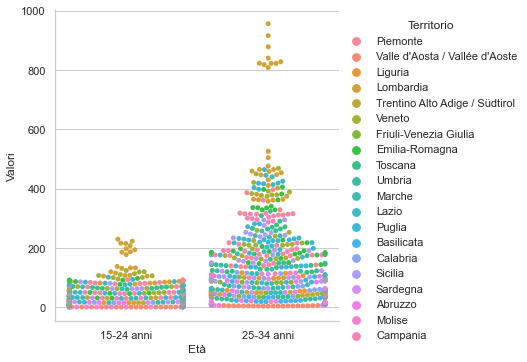

In [30]:
seaborn.set_style(style="whitegrid")
sns.catplot(x="Età", y="Valori", kind="swarm", hue="Territorio", data=primo_data)

C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\lalla\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.0% of the points 

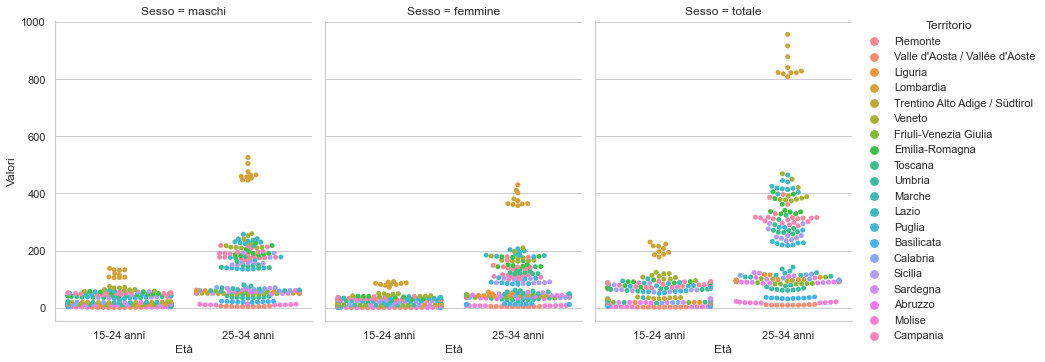

In [31]:
sns.catplot(x="Età", y="Valori", hue="Territorio",
            col="Sesso", aspect=.8,
            kind="swarm", data=primo_data)

**COMMENTO GRAFICO:** *Questo grafico è più dettagliato rispetto ai precedenti poichè analizza l'occupazione in funzione del sesso ma in questo caso vengono evidenziate anche le differenti regioni*

***

**Importiamo il Dataset "tasso scolarità" dei giovani tra i 15 - 34 anni divisi titolo di studio (lo si trova sempre sul sito di Giovanistat)**

In [32]:
tasso_scolarità = pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Tasso scolarità.csv")
tasso_scolarità

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TITOLO_STUDIO,Titolo di studio,CITTADINANZA,Cittadinanza,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010,2010,57.725,NaN,NaN
1,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q2,T2-2010,70.229,NaN,NaN
2,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q1,T1-2010,75.314,NaN,NaN
3,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q4,T4-2010,44.196,NaN,NaN
4,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),1,maschi,Y15-24,15-24 anni,3,"licenza di scuola elementare, nessun titolo di...",TOTAL,totale,2010-Q3,T3-2010,41.161,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q2,T2-2019,6542.816,NaN,NaN
1304,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q4,T4-2019,6507.638,NaN,NaN
1305,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2019-Q3,T3-2019,6519.996,NaN,NaN
1306,IT,Italia,POP_15,popolazione 15 anni e oltre (migliaia),9,totale,Y25-34,25-34 anni,99,totale,TOTAL,totale,2020-Q2,T2-2020,6472.912,NaN,NaN


In [33]:
tasso_scolarità.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TITOLO_STUDIO           0
Titolo di studio        0
CITTADINANZA            0
Cittadinanza            0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1308
Flags                1308
dtype: int64

**Tutti i valori di "Flag Codes" e "Flag" sono nulli (1320) pertanto eliminiamo le due colonne perchè non ci interessano per la nostra analisi e creiamo un nuovo dataset con le colonne che ci interessano**

In [34]:
#ts = tasso di scolarità
ts= pd.DataFrame(data=tasso_scolarità, columns =['Territorio', 'Sesso', 'Classe di età', 'Titolo di studio','Seleziona periodo', 'Value' ])
ts

,Territorio,Sesso,Classe di età,Titolo di studio,Seleziona periodo,Value
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


In [35]:
ts.rename(columns={"Seleziona periodo": "Periodo", "Value": "Valori", "Classe di età" : "Età"},inplace=True) 
ts

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


In [36]:
ts.rename(columns={"Value": "Valori"},inplace=True) 
ts

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


Nella colonna "Periodo" ci sono dei valori contenenti la lettera T che però non ci interessano per la nostra analisi pertanto li togliamo

In [37]:
ts=ts[~ts.Periodo.str.contains("T")]
ts

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
5,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,52.413
10,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,56.919
15,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,51.859
20,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,45.993
...,...,...,...,...,...,...
1281,Italia,totale,25-34 anni,totale,2015,6837.353
1286,Italia,totale,25-34 anni,totale,2016,6760.848
1291,Italia,totale,25-34 anni,totale,2017,6677.184
1296,Italia,totale,25-34 anni,totale,2018,6607.820


In [38]:
ts1=ts.groupby(["Sesso", "Età", "Titolo di studio","Periodo","Valori"]).sum()
ts1

Territorio
Sesso   Età        Titolo di studio Periodo Valori             
femmine 15-24 anni diploma          2010    1294.455     Italia
                                    2011    1305.399     Italia
                                    2012    1318.735     Italia
                                    2013    1328.669     Italia
                                    2014    1311.619     Italia
...                                                         ...
totale  25-34 anni totale           2015    6837.353     Italia
                                    2016    6760.848     Italia
                                    2017    6677.184     Italia
                                    2018    6607.820     Italia
                                    2019    6532.872     Italia

[300 rows x 1 columns]

**La tabella non ci evidenzia il sesso maschile ma in realtà i valori ci sono (vedi sotto):**

In [39]:
ts2=ts1.groupby(["Sesso"]).count().reset_index()
ts2["Sesso"]

0    femmine
1     maschi
2     totale
Name: Sesso, dtype: object

In [40]:
ts3=ts.groupby(["Titolo di studio"]).sum()
ts3

,Valori
Titolo di studio,
diploma,119550.989
laurea e post-laurea,38336.361
"licenza di scuola elementare, nessun titolo di studio",4933.258
licenza di scuola media,94224.796
totale,257045.401


**Creiamo un primo grafico a torta contenente i vari titoli di studio**

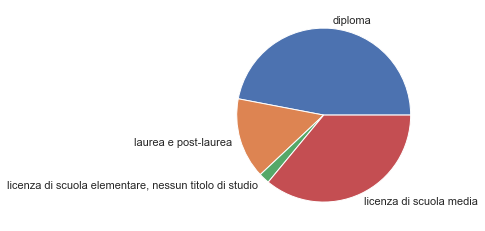

In [41]:
#x = np.array([119550.989, 38336.361, 4933.258, 94224.796])
fracs = [47, 15, 2, 36]
label = ["diploma", "laurea e post-laurea", "licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media"]
plt.pie(fracs, labels=label)
plt.show()


In [42]:
ts4=ts.groupby(["Titolo di studio","Periodo" ]).sum()
ts4

Valori
Titolo di studio                                   Periodo           
diploma                                            2010     12554.662
                                                   2011     12420.473
                                                   2012     12231.868
                                                   2013     12200.951
                                                   2014     12084.105
                                                   2015     11904.191
                                                   2016     11684.760
                                                   2017     11581.684
                                                   2018     11427.278
                                                   2019     11461.017
laurea e post-laurea                               2010      3466.648
                                                   2011      3444.130
                                                   2012      3605.293
                                                   2013      3649.452
                                                   2014      3827.076
                                                   2015      3892.945
                                                   2016      3933.137
                                                   2017      4094.818
                                                   2018      4210.588
                                                   2019      4212.274
licenza di scuola elementare, nessun titolo di ... 2010       647.097
                                                   2011       605.606
                                                   2012       577.934
                                                   2013       563.692
                                                   2014       509.874
                                                   2015       453.811
                                                   2016       434.404
                                                   2017       399.166
                                                   2018       383.606
                                                   2019       358.068
licenza di scuola media                            2010     10213.548
                                                   2011     10017.553
                                                   2012      9770.602
                                                   2013      9570.808
                                                   2014      9348.418
                                                   2015      9297.077
                                                   2016      9276.608
                                                   2017      9035.421
                                                   2018      8917.788
                                                   2019      8776.973
totale                                             2010     26881.956
                                                   2011     26487.762
                                                   2012     26185.697
                                                   2013     25984.904
                                                   2014     25769.474
                                                   2015     25548.020
                                                   2016     25328.911
                                                   2017     25111.089
                                                   2018     24939.260
                                                   2019     24808.328

**Creiamo un grafico a torta per ciascun anno suddiviso per titolo di studio, in modo da poter vedere in modo chiaro e lineare l'andamento del tasso di scolarità nel decennio 2010-2020**.


**Estraiamo innanzitutto dal dataset "ts" l'anno su cui mi concentro per elaborare i dati. Una volta ottenuti i dati di un certo anno, cambio la funzione immettendo l'anno successivo di riferimento.**

In [43]:
prova=ts[ts.Periodo.str.contains("2010")]
prova

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
52,Italia,maschi,15-24 anni,licenza di scuola media,2010,1680.045
104,Italia,maschi,15-24 anni,diploma,2010,1258.888
114,Italia,maschi,15-24 anni,laurea e post-laurea,2010,65.230
166,Italia,maschi,15-24 anni,totale,2010,3061.888
218,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,43.039
270,Italia,femmine,15-24 anni,licenza di scuola media,2010,1465.782
322,Italia,femmine,15-24 anni,diploma,2010,1294.455
332,Italia,femmine,15-24 anni,laurea e post-laurea,2010,117.219
384,Italia,femmine,15-24 anni,totale,2010,2920.495


**In questo modo, eseguendo varie divisioni, ottengo i dati necessari per la mia analisi.**

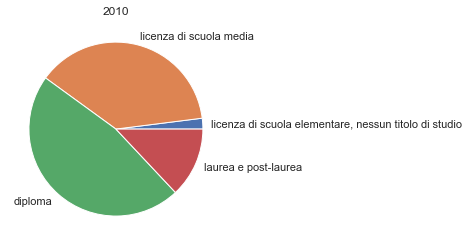

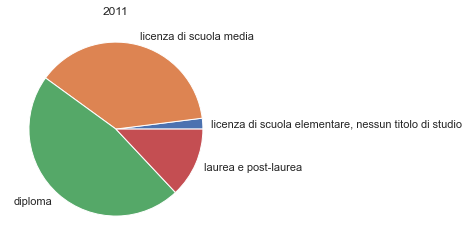

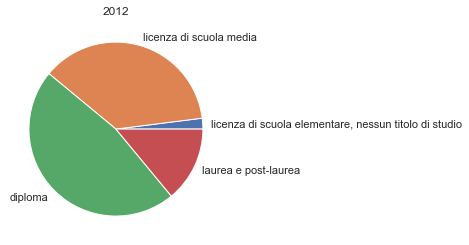

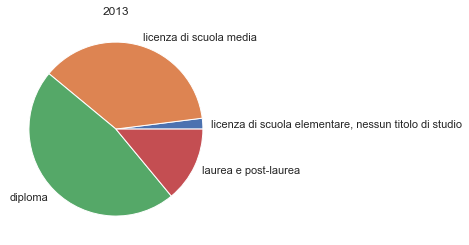

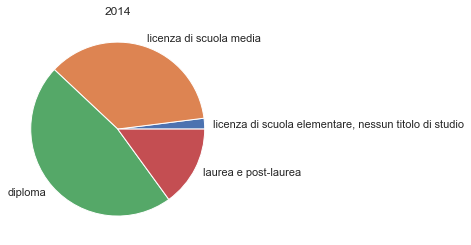

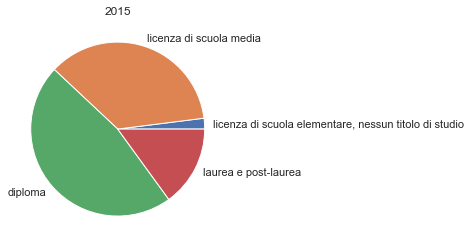

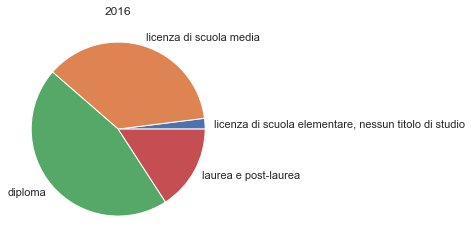

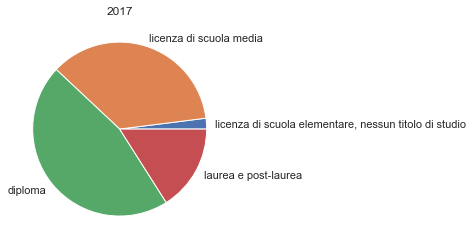

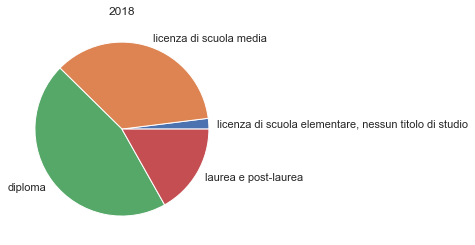

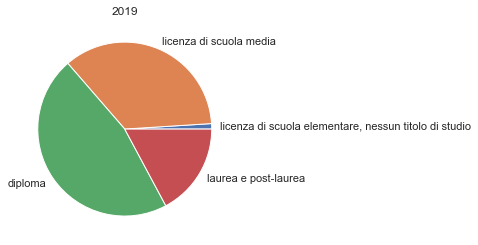

In [44]:
#anno 2010 --> x = np.array([323.549, 5.106.774, 6.277.331, 1.733.324])
fracs = [2, 38, 47, 13]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2010') #titolo del grafico
plt.show()

#anno 2011 --> x = np.array([302.803, 5.008.777, 6.210.236, 1.722.065])
fracs = [2, 38, 47, 13]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2011') #titolo del grafico
plt.show()

#anno 2012 --> x = np.array([288.967, 4.885.301, 6.115.934, 1.802.647])
fracs = [2, 37, 47, 14]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2012') #titolo del grafico
plt.show()

#anno 2013 --> x = np.array([281.846, 4.785.404, 6.100.475, 1.824.726])
fracs = [2, 37, 47, 14]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2013') #titolo del grafico
plt.show()

#anno 2014 --> x = np.array([254.937, 4.674.209, 6.042.053, 1.913.538])
fracs = [2, 36, 47, 15]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2014') #titolo del grafico
plt.show()

#anno 2015 --> x = np.array([226.906, 4.648.539, 5.952.096, 1.946.473])
fracs = [2, 36, 47, 15]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2015') #titolo del grafico
plt.show()

#anno 2016 --> x = np.array([217.202, 4.638.304, 5.842.380, 1.966.568])
fracs = [2, 37, 46, 16]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2016') #titolo del grafico
plt.show()

#anno 2017 --> x = np.array([206.404, 4.557.317, 5.840.044, 2.002.046])
fracs = [2, 36, 46, 16]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2017') #titolo del grafico
plt.show()

#anno 2018 --> x = np.array([191.803, 4.458.894, 5.713.639, 2.105.294])
fracs = [2, 36, 46, 17]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2018') #titolo del grafico
plt.show()

#anno 2019 --> x = np.array([179.035, 4.388.487, 5.730.509, 2.106.137])
fracs = [1, 35, 46, 17]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('2019') #titolo del grafico
plt.show()

**Ci siamo accorte che le percentuali dei vari titoli di studio variano in minima misura di anno in anno. Inoltre, la leggibilità di questo tipo di grafico risulta un po' scarsa.
Proviamo, quindi, ad utilizzare un altro grafico (stripplot)**

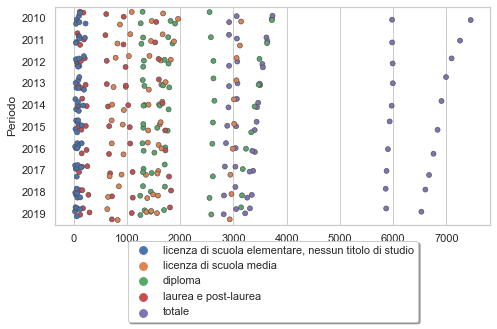

In [45]:
ax = sns.stripplot(data=ts, x="Valori", y="Periodo", hue = "Titolo di studio", jitter=0.3, linewidth=0.6)
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.3, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=1)
plt.show()


**Si decide ora di procedere analizzando lo scostamento del tasso di scolarità tra maschi e femmine.**

***Partiamo continuando ad utilizzare i grafici a torta*** - più avanti cambieremo tipo di grafico

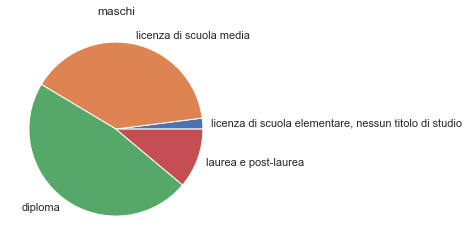

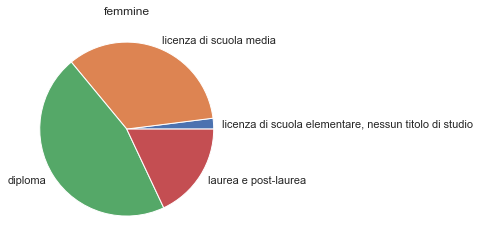

In [46]:
#2010-2019 maschi --> x = np.array([1.375.948, 25.728.611, 30.761.978, 7.429.871])
fracs = [2, 39, 47, 11]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('maschi') #titolo del grafico
plt.show()

#2010-2019 femmine --> x = np.array([1.097.504, 21.423.395, 29.062.719, 11.692.947])
fracs = [2, 34, 46, 18]
label = ["licenza di scuola elementare, nessun titolo di studio", "licenza di scuola media","diploma", "laurea e post-laurea"]
plt.pie(fracs, labels=label)
plt.title('femmine') #titolo del grafico
plt.show()

***Mostriamo ora come si può arrivare ai grafici sopra creando dei dataset appositi***

Filtro il dataset solo per Sesso > ***Maschi***

In [47]:
prova1=ts[ts.Sesso.str.contains("maschi")]
prova1

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
5,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,52.413
10,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,56.919
15,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,51.859
20,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,45.993
...,...,...,...,...,...,...
845,Italia,maschi,25-34 anni,totale,2015,3436.788
850,Italia,maschi,25-34 anni,totale,2016,3404.920
855,Italia,maschi,25-34 anni,totale,2017,3371.524
860,Italia,maschi,25-34 anni,totale,2018,3346.635


Seleziono solo le colonne che mi interessano

In [48]:
maschi_totale = pd.DataFrame(data=prova1, columns =['Sesso', 'Titolo di studio', 'Valori' ])
maschi_totale

,Sesso,Titolo di studio,Valori
0,maschi,"licenza di scuola elementare, nessun titolo di...",57.725
5,maschi,"licenza di scuola elementare, nessun titolo di...",52.413
10,maschi,"licenza di scuola elementare, nessun titolo di...",56.919
15,maschi,"licenza di scuola elementare, nessun titolo di...",51.859
20,maschi,"licenza di scuola elementare, nessun titolo di...",45.993
...,...,...,...
845,maschi,totale,3436.788
850,maschi,totale,3404.920
855,maschi,totale,3371.524
860,maschi,totale,3346.635


Filtro il dataset solo per Sesso > ***Femmine***

In [49]:
prova2=ts[ts.Sesso.str.contains("femmine")]
prova2

,Territorio,Sesso,Età,Titolo di studio,Periodo,Valori
218,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,43.039
223,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,39.858
228,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,41.653
233,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,36.446
238,Italia,femmine,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,31.296
...,...,...,...,...,...,...
1063,Italia,femmine,25-34 anni,totale,2015,3400.565
1068,Italia,femmine,25-34 anni,totale,2016,3355.927
1073,Italia,femmine,25-34 anni,totale,2017,3305.659
1078,Italia,femmine,25-34 anni,totale,2018,3261.184


Seleziono solo le colonne che mi interessano

In [50]:
femmine_totale = pd.DataFrame(data=prova2, columns =['Sesso', 'Titolo di studio', 'Valori' ])
femmine_totale

,Sesso,Titolo di studio,Valori
218,femmine,"licenza di scuola elementare, nessun titolo di...",43.039
223,femmine,"licenza di scuola elementare, nessun titolo di...",39.858
228,femmine,"licenza di scuola elementare, nessun titolo di...",41.653
233,femmine,"licenza di scuola elementare, nessun titolo di...",36.446
238,femmine,"licenza di scuola elementare, nessun titolo di...",31.296
...,...,...,...
1063,femmine,totale,3400.565
1068,femmine,totale,3355.927
1073,femmine,totale,3305.659
1078,femmine,totale,3261.184


Mostro in modo più ordinato il dataset dei *maschi*

In [51]:
prova3=prova1.groupby(["Titolo di studio","Sesso" ]).sum()
prova3

,,Valori
Titolo di studio,Sesso,
diploma,maschi,30761.978
laurea e post-laurea,maschi,7429.871
"licenza di scuola elementare, nessun titolo di studio",maschi,1375.948
licenza di scuola media,maschi,25728.611
totale,maschi,65296.402


Mostro in modo più ordinato il dataset delle *femmine*

In [52]:
prova4=prova2.groupby(["Titolo di studio","Sesso" ]).sum()
prova4

,,Valori
Titolo di studio,Sesso,
diploma,femmine,29013.517
laurea e post-laurea,femmine,11738.310
"licenza di scuola elementare, nessun titolo di studio",femmine,1090.683
licenza di scuola media,femmine,21383.788
totale,femmine,63226.298


***Unisco i dataset dei maschi e delle femmine in un unico dataset, in modo da poterlo utilizzare al fine di creare un grafico più ordinato***

In [53]:
totale_ts=pd.merge(left=maschi_totale, right=femmine_totale, how='outer',on=("Valori", "Titolo di studio", "Sesso"))
totale_ts

,Sesso,Titolo di studio,Valori
0,maschi,"licenza di scuola elementare, nessun titolo di...",57.725
1,maschi,"licenza di scuola elementare, nessun titolo di...",52.413
2,maschi,"licenza di scuola elementare, nessun titolo di...",56.919
3,maschi,"licenza di scuola elementare, nessun titolo di...",51.859
4,maschi,"licenza di scuola elementare, nessun titolo di...",45.993
...,...,...,...
195,femmine,totale,3400.565
196,femmine,totale,3355.927
197,femmine,totale,3305.659
198,femmine,totale,3261.184


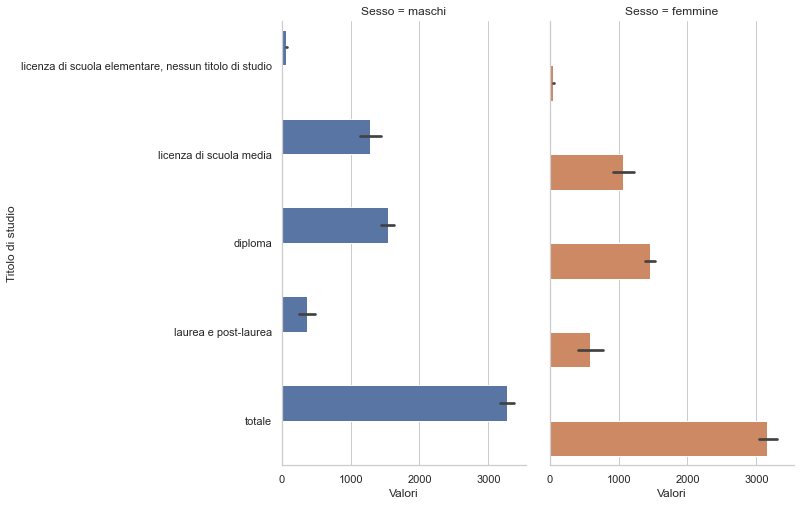

In [54]:
sns.color_palette()
sns.catplot(data=totale_ts, x="Valori", y="Titolo di studio", hue="Sesso", col="Sesso",kind="bar",height=7, aspect=.8)

**Come si può notare dal grafico sopra, vi sono delle differenze tra i valori dei titoli di studio tra maschi e femmine.** 

**Ad esempio**:
- **licenza di scuola elementare, nessun titolo di studio**: *maschi > femmine*
- **licenza di scuola media**: *maschi > femmine*
- **diploma**: *maschi > femmine*
- **laurea**: *maschi < femmine*

 ***

### **Ora continuiamo la nostra analisi importando un ulteriore dataset in cui vengono evidenziati i tassi di disoccupazione giovanile per poterli confrontare con quelli di occupazione**

In [55]:
tabella_iniziale_disoc= pd.read_csv("C:/Users/lalla/Desktop/UNIMI/Tasso disoccupazione.csv")
tabella_iniziale_disoc

,ITTER107,Territorio,TIPO_DATO_FOL,Tipo dato,SEXISTAT1,Sesso,ETA1,Classe di età,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2010,2010,26.669293,NaN,NaN
1,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2011,2011,23.777270,NaN,NaN
2,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2012,2012,29.870147,NaN,NaN
3,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2013,2013,40.233077,NaN,NaN
4,ITC1,Piemonte,UNEM_R,tasso di disoccupazione,1,maschi,Y15-24,15-24 anni,2014,2014,41.636268,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2015,2015,36.901490,NaN,NaN
1316,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2016,2016,37.043544,NaN,NaN
1317,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2017,2017,27.681294,NaN,NaN
1318,ITE3,Marche,UNEM_R,tasso di disoccupazione,2,femmine,Y15-24,15-24 anni,2018,2018,28.532478,NaN,NaN


In [56]:
tabella_iniziale_disoc.isnull().sum()

ITTER107                0
Territorio              0
TIPO_DATO_FOL           0
Tipo dato               0
SEXISTAT1               0
Sesso                   0
ETA1                    0
Classe di età           0
TIME                    0
Seleziona periodo       0
Value                   0
Flag Codes           1320
Flags                1320
dtype: int64

In [57]:
tasso_disoccupazione_giovanile= pd.DataFrame(data=tabella_iniziale_disoc, columns =['Territorio', 'SEXISTAT1', 'Sesso', 'Classe di età', 'Seleziona periodo', 'Value' ])
tasso_disoccupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Classe di età,Seleziona periodo,Value
0,Piemonte,1,maschi,15-24 anni,2010,26.669293
1,Piemonte,1,maschi,15-24 anni,2011,23.777270
2,Piemonte,1,maschi,15-24 anni,2012,29.870147
3,Piemonte,1,maschi,15-24 anni,2013,40.233077
4,Piemonte,1,maschi,15-24 anni,2014,41.636268
...,...,...,...,...,...,...
1315,Marche,2,femmine,15-24 anni,2015,36.901490
1316,Marche,2,femmine,15-24 anni,2016,37.043544
1317,Marche,2,femmine,15-24 anni,2017,27.681294
1318,Marche,2,femmine,15-24 anni,2018,28.532478


In [58]:
tasso_disoccupazione_giovanile.rename(columns={"Value": "Valori", "Seleziona periodo":"Anni", "Classe di età":"Età"},inplace=True)

In [59]:
tasso_occupazione_giovanile

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


In [60]:
#TDG=tasso disoccupazione giovanile
TDG_regioni=tasso_disoccupazione_giovanile[~tasso_disoccupazione_giovanile.Territorio.str.contains("Provincia")]
TDG_regioni

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,26.669293
1,Piemonte,1,maschi,15-24 anni,2011,23.777270
2,Piemonte,1,maschi,15-24 anni,2012,29.870147
3,Piemonte,1,maschi,15-24 anni,2013,40.233077
4,Piemonte,1,maschi,15-24 anni,2014,41.636268
...,...,...,...,...,...,...
1315,Marche,2,femmine,15-24 anni,2015,36.901490
1316,Marche,2,femmine,15-24 anni,2016,37.043544
1317,Marche,2,femmine,15-24 anni,2017,27.681294
1318,Marche,2,femmine,15-24 anni,2018,28.532478


In [61]:
primo_data_disoc=TDG_regioni[['Territorio','Sesso','Valori','Età']]
primo_data_disoc

,Territorio,Sesso,Valori,Età
0,Piemonte,maschi,26.669293,15-24 anni
1,Piemonte,maschi,23.777270,15-24 anni
2,Piemonte,maschi,29.870147,15-24 anni
3,Piemonte,maschi,40.233077,15-24 anni
4,Piemonte,maschi,41.636268,15-24 anni
...,...,...,...,...
1315,Marche,femmine,36.901490,15-24 anni
1316,Marche,femmine,37.043544,15-24 anni
1317,Marche,femmine,27.681294,15-24 anni
1318,Marche,femmine,28.532478,15-24 anni


In [62]:
primo_data2=TOG_regioni[['Territorio', 'Sesso', 'Valori', 'Età', "Anni"]]
primo_data2

,Territorio,Sesso,Valori,Età,Anni
0,Piemonte,maschi,52.110,15-24 anni,2010
1,Piemonte,maschi,54.017,15-24 anni,2011
2,Piemonte,maschi,52.224,15-24 anni,2012
3,Piemonte,maschi,42.618,15-24 anni,2013
4,Piemonte,maschi,39.999,15-24 anni,2014
...,...,...,...,...,...
1315,Umbria,femmine,28.447,25-34 anni,2015
1316,Umbria,femmine,29.167,25-34 anni,2016
1317,Umbria,femmine,26.733,25-34 anni,2017
1318,Umbria,femmine,24.818,25-34 anni,2018


In [63]:
primo_data_disoc2=TDG_regioni[['Territorio','Sesso','Valori','Età', "Anni"]]
primo_data_disoc2

,Territorio,Sesso,Valori,Età,Anni
0,Piemonte,maschi,26.669293,15-24 anni,2010
1,Piemonte,maschi,23.777270,15-24 anni,2011
2,Piemonte,maschi,29.870147,15-24 anni,2012
3,Piemonte,maschi,40.233077,15-24 anni,2013
4,Piemonte,maschi,41.636268,15-24 anni,2014
...,...,...,...,...,...
1315,Marche,femmine,36.901490,15-24 anni,2015
1316,Marche,femmine,37.043544,15-24 anni,2016
1317,Marche,femmine,27.681294,15-24 anni,2017
1318,Marche,femmine,28.532478,15-24 anni,2018


In [64]:
occ_e_disocc =pd.merge(left=primo_data2, right=primo_data_disoc2, how='outer',on=("Sesso","Territorio","Età", "Anni"))
occ_e_disocc

,Territorio,Sesso,Valori_x,Età,Anni,Valori_y
0,Piemonte,maschi,52.110,15-24 anni,2010,26.669293
1,Piemonte,maschi,54.017,15-24 anni,2011,23.777270
2,Piemonte,maschi,52.224,15-24 anni,2012,29.870147
3,Piemonte,maschi,42.618,15-24 anni,2013,40.233077
4,Piemonte,maschi,39.999,15-24 anni,2014,41.636268
...,...,...,...,...,...,...
1195,Umbria,femmine,28.447,25-34 anni,2015,16.719363
1196,Umbria,femmine,29.167,25-34 anni,2016,16.175203
1197,Umbria,femmine,26.733,25-34 anni,2017,21.571906
1198,Umbria,femmine,24.818,25-34 anni,2018,17.333955


In [65]:
pd.melt(occ_e_disocc, id_vars =['Territorio'], value_vars =['Valori_x', 'Valori_y'],var_name ='Variabili', value_name ='Valori') 

,Territorio,Variabili,Valori
0,Piemonte,Valori_x,52.110000
1,Piemonte,Valori_x,54.017000
2,Piemonte,Valori_x,52.224000
3,Piemonte,Valori_x,42.618000
4,Piemonte,Valori_x,39.999000
...,...,...,...
2395,Umbria,Valori_y,16.719363
2396,Umbria,Valori_y,16.175203
2397,Umbria,Valori_y,21.571906
2398,Umbria,Valori_y,17.333955


In [66]:
#disoccupazione totale
totale2=primo_data_disoc[primo_data_disoc.Sesso == "totale"]
totale2

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,26.645422,15-24 anni
21,Piemonte,totale,24.973022,15-24 anni
22,Piemonte,totale,32.079402,15-24 anni
23,Piemonte,totale,40.640527,15-24 anni
24,Piemonte,totale,42.233026,15-24 anni
...,...,...,...,...
1295,Calabria,totale,36.225437,25-34 anni
1296,Calabria,totale,38.808266,25-34 anni
1297,Calabria,totale,34.371335,25-34 anni
1298,Calabria,totale,29.761071,25-34 anni


In [67]:
#occupazione totale
totale=primo_data[primo_data.Sesso == "totale"]
totale

,Territorio,Sesso,Valori,Età
20,Piemonte,totale,92.305,15-24 anni
21,Piemonte,totale,93.164,15-24 anni
22,Piemonte,totale,88.688,15-24 anni
23,Piemonte,totale,71.562,15-24 anni
24,Piemonte,totale,70.225,15-24 anni
...,...,...,...,...
1305,Liguria,totale,95.891,25-34 anni
1306,Liguria,totale,92.441,25-34 anni
1307,Liguria,totale,94.548,25-34 anni
1308,Liguria,totale,98.542,25-34 anni


In [68]:
occ_e_disocc2 =pd.merge(left=totale, right=totale2, how='outer',on=("Territorio", "Sesso", "Età"))
occ_e_disocc2

,Territorio,Sesso,Valori_x,Età,Valori_y
0,Piemonte,totale,92.305,15-24 anni,26.645422
1,Piemonte,totale,92.305,15-24 anni,24.973022
2,Piemonte,totale,92.305,15-24 anni,32.079402
3,Piemonte,totale,92.305,15-24 anni,40.640527
4,Piemonte,totale,92.305,15-24 anni,42.233026
...,...,...,...,...,...
3995,Liguria,totale,97.624,25-34 anni,16.036811
3996,Liguria,totale,97.624,25-34 anni,15.489468
3997,Liguria,totale,97.624,25-34 anni,14.440845
3998,Liguria,totale,97.624,25-34 anni,13.074046


In [69]:
provadef_occ=pd.DataFrame(data=totale, columns =['Territorio', 'Valori'])
provadef_occ

,Territorio,Valori
20,Piemonte,92.305
21,Piemonte,93.164
22,Piemonte,88.688
23,Piemonte,71.562
24,Piemonte,70.225
...,...,...
1305,Liguria,95.891
1306,Liguria,92.441
1307,Liguria,94.548
1308,Liguria,98.542


In [70]:
provadef_disocc=pd.DataFrame(data=totale2, columns =['Territorio', 'Valori'])
provadef_disocc

,Territorio,Valori
20,Piemonte,26.645422
21,Piemonte,24.973022
22,Piemonte,32.079402
23,Piemonte,40.640527
24,Piemonte,42.233026
...,...,...
1295,Calabria,36.225437
1296,Calabria,38.808266
1297,Calabria,34.371335
1298,Calabria,29.761071


In [71]:
unione_dataset=pd.merge(left=provadef_occ, right=provadef_disocc, how='outer',on=("Territorio", "Valori"))
unione_dataset

,Territorio,Valori
0,Piemonte,92.305000
1,Piemonte,93.164000
2,Piemonte,88.688000
3,Piemonte,71.562000
4,Piemonte,70.225000
...,...,...
795,Calabria,36.225437
796,Calabria,38.808266
797,Calabria,34.371335
798,Calabria,29.761071


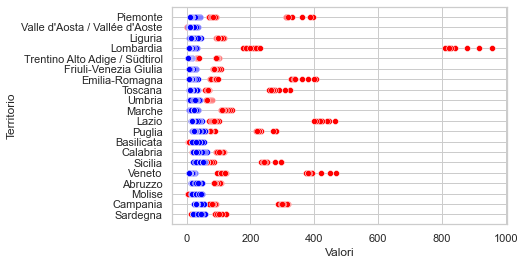

In [72]:
sns.scatterplot(x="Valori", y="Territorio", data=provadef_occ, color="red");
sns.scatterplot(x="Valori", y="Territorio", data=provadef_disocc, color="blue");
plt.show()

**ORA PROVIAMO UN'ULTERIORE ANALISI PER UNIRE IL TASSO DI SCOLARITA' E IL TASSO DI OCCUPAZIONE**

In [73]:
ts= pd.DataFrame(data=tasso_scolarità, columns =['Territorio', 'Sesso', 'Classe di età', 'Titolo di studio','Seleziona periodo', 'Value' ])
ts

,Territorio,Sesso,Classe di età,Titolo di studio,Seleziona periodo,Value
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


In [74]:
ts.rename(columns={"Seleziona periodo": "Anni", "Value": "Valori", "Classe di età" : "Età", "Titolo di studio":"Istruzione"},inplace=True) 
ts

,Territorio,Sesso,Età,Istruzione,Anni,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
1,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T2-2010,70.229
2,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T1-2010,75.314
3,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T4-2010,44.196
4,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",T3-2010,41.161
...,...,...,...,...,...,...
1303,Italia,totale,25-34 anni,totale,T2-2019,6542.816
1304,Italia,totale,25-34 anni,totale,T4-2019,6507.638
1305,Italia,totale,25-34 anni,totale,T3-2019,6519.996
1306,Italia,totale,25-34 anni,totale,T2-2020,6472.912


In [75]:
ts1=ts[~ts.Anni.str.contains("T")]
ts1

,Territorio,Sesso,Età,Istruzione,Anni,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
5,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,52.413
10,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,56.919
15,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,51.859
20,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,45.993
...,...,...,...,...,...,...
1281,Italia,totale,25-34 anni,totale,2015,6837.353
1286,Italia,totale,25-34 anni,totale,2016,6760.848
1291,Italia,totale,25-34 anni,totale,2017,6677.184
1296,Italia,totale,25-34 anni,totale,2018,6607.820


In [76]:
ts2=ts1[~ts1.Istruzione.str.contains("totale")]
ts2

,Territorio,Sesso,Età,Istruzione,Anni,Valori
0,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2010,57.725
5,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2011,52.413
10,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2012,56.919
15,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2013,51.859
20,Italia,maschi,15-24 anni,"licenza di scuola elementare, nessun titolo di...",2014,45.993
...,...,...,...,...,...,...
1229,Italia,totale,25-34 anni,laurea e post-laurea,2015,1718.862
1234,Italia,totale,25-34 anni,laurea e post-laurea,2016,1724.476
1239,Italia,totale,25-34 anni,laurea e post-laurea,2017,1791.362
1244,Italia,totale,25-34 anni,laurea e post-laurea,2018,1828.673


In [77]:
ts_def= pd.DataFrame(data=ts2, columns =['Territorio','Anni','Istruzione', 'Valori'])
ts_def

,Territorio,Anni,Istruzione,Valori
0,Italia,2010,"licenza di scuola elementare, nessun titolo di...",57.725
5,Italia,2011,"licenza di scuola elementare, nessun titolo di...",52.413
10,Italia,2012,"licenza di scuola elementare, nessun titolo di...",56.919
15,Italia,2013,"licenza di scuola elementare, nessun titolo di...",51.859
20,Italia,2014,"licenza di scuola elementare, nessun titolo di...",45.993
...,...,...,...,...
1229,Italia,2015,laurea e post-laurea,1718.862
1234,Italia,2016,laurea e post-laurea,1724.476
1239,Italia,2017,laurea e post-laurea,1791.362
1244,Italia,2018,laurea e post-laurea,1828.673


In [78]:
TOG_regioni

,Territorio,SEXISTAT1,Sesso,Età,Anni,Valori
0,Piemonte,1,maschi,15-24 anni,2010,52.110
1,Piemonte,1,maschi,15-24 anni,2011,54.017
2,Piemonte,1,maschi,15-24 anni,2012,52.224
3,Piemonte,1,maschi,15-24 anni,2013,42.618
4,Piemonte,1,maschi,15-24 anni,2014,39.999
...,...,...,...,...,...,...
1315,Umbria,2,femmine,25-34 anni,2015,28.447
1316,Umbria,2,femmine,25-34 anni,2016,29.167
1317,Umbria,2,femmine,25-34 anni,2017,26.733
1318,Umbria,2,femmine,25-34 anni,2018,24.818


In [79]:
TOG_regioni_def= pd.DataFrame(data=TOG_regioni, columns =['Territorio','Anni', 'Valori'])
TOG_regioni_def

,Territorio,Anni,Valori
0,Piemonte,2010,52.110
1,Piemonte,2011,54.017
2,Piemonte,2012,52.224
3,Piemonte,2013,42.618
4,Piemonte,2014,39.999
...,...,...,...
1315,Umbria,2015,28.447
1316,Umbria,2016,29.167
1317,Umbria,2017,26.733
1318,Umbria,2018,24.818


In [80]:
unione_dataset=pd.concat([ts_def, TOG_regioni_def], join="inner")
unione_dataset

,Territorio,Anni,Valori
0,Italia,2010,57.725
5,Italia,2011,52.413
10,Italia,2012,56.919
15,Italia,2013,51.859
20,Italia,2014,45.993
...,...,...,...
1315,Umbria,2015,28.447
1316,Umbria,2016,29.167
1317,Umbria,2017,26.733
1318,Umbria,2018,24.818


In [81]:
unione_dataset.isnull().sum()

Territorio    0
Anni          0
Valori        0
dtype: int64

In [82]:
unione_dataset1=pd.DataFrame(data=unione_dataset, columns =['Anni', 'Valori'])
unione_dataset1

,Anni,Valori
0,2010,57.725
5,2011,52.413
10,2012,56.919
15,2013,51.859
20,2014,45.993
...,...,...
1315,2015,28.447
1316,2016,29.167
1317,2017,26.733
1318,2018,24.818


**Come ultima analisi, più approfondita, abbiamo deciso di considerare l'occupazione e la disoccupazione giovanile nella regione Sicilia nell'anno più recente quindi 2019 confrontando i dati con un articolo di giornale molto interessante: https://palermo.repubblica.it/cronaca/2019/07/06/news/sicilia_cresce_la_disoccupazione_da_23_anni_mai_cosi_pochi_al_lavoro-230478842/**

Prendiamo il dataset dell'occupazione giovanile "TOG_regioni" e selezioniamo solo le colonne che ci interessano

In [83]:
Regioni_occ=pd.DataFrame(data=TOG_regioni, columns =['Territorio', 'Valori', 'Sesso', 'Anni', 'Età'])
Regioni_occ

,Territorio,Valori,Sesso,Anni,Età
0,Piemonte,52.110,maschi,2010,15-24 anni
1,Piemonte,54.017,maschi,2011,15-24 anni
2,Piemonte,52.224,maschi,2012,15-24 anni
3,Piemonte,42.618,maschi,2013,15-24 anni
4,Piemonte,39.999,maschi,2014,15-24 anni
...,...,...,...,...,...
1315,Umbria,28.447,femmine,2015,25-34 anni
1316,Umbria,29.167,femmine,2016,25-34 anni
1317,Umbria,26.733,femmine,2017,25-34 anni
1318,Umbria,24.818,femmine,2018,25-34 anni


In [84]:
valori_totali_occ=Regioni_occ[Regioni_occ.Sesso.str.contains("totale")]
valori_totali_occ

,Territorio,Valori,Sesso,Anni,Età
20,Piemonte,92.305,totale,2010,15-24 anni
21,Piemonte,93.164,totale,2011,15-24 anni
22,Piemonte,88.688,totale,2012,15-24 anni
23,Piemonte,71.562,totale,2013,15-24 anni
24,Piemonte,70.225,totale,2014,15-24 anni
...,...,...,...,...,...
1305,Liguria,95.891,totale,2015,25-34 anni
1306,Liguria,92.441,totale,2016,25-34 anni
1307,Liguria,94.548,totale,2017,25-34 anni
1308,Liguria,98.542,totale,2018,25-34 anni


In [85]:
Occ_Sicilia=valori_totali_occ[valori_totali_occ.Territorio.str.contains("Sicilia")]
Occ_Sicilia

,Territorio,Valori,Sesso,Anni,Età
480,Sicilia,86.007,totale,2010,15-24 anni
481,Sicilia,80.700,totale,2011,15-24 anni
482,Sicilia,72.120,totale,2012,15-24 anni
483,Sicilia,63.318,totale,2013,15-24 anni
484,Sicilia,60.121,totale,2014,15-24 anni
485,Sicilia,63.100,totale,2015,15-24 anni
486,Sicilia,62.593,totale,2016,15-24 anni
487,Sicilia,63.158,totale,2017,15-24 anni
488,Sicilia,55.152,totale,2018,15-24 anni
489,Sicilia,56.336,totale,2019,15-24 anni


In [86]:
Occ_Sicilia_2019=Occ_Sicilia[Occ_Sicilia['Anni']==(2019)]
Occ_Sicilia_2019

,Territorio,Valori,Sesso,Anni,Età
489,Sicilia,56.336,totale,2019,15-24 anni
1149,Sicilia,243.029,totale,2019,25-34 anni


**Sommando i due valori, In Sicilia, nel 2019, il numero di occupati si aggirava intorno ai 50.678125**

Ora facciamo la stessa cosa dal lato della disoccupazione prendendo  il dataset "TDG_regioni" e selezioniamo solo le colonne che ci interessano

In [87]:
Regioni_disocc=pd.DataFrame(data=TDG_regioni, columns =['Territorio', 'Valori', 'Sesso', 'Anni', 'Età'])
Regioni_disocc

,Territorio,Valori,Sesso,Anni,Età
0,Piemonte,26.669293,maschi,2010,15-24 anni
1,Piemonte,23.777270,maschi,2011,15-24 anni
2,Piemonte,29.870147,maschi,2012,15-24 anni
3,Piemonte,40.233077,maschi,2013,15-24 anni
4,Piemonte,41.636268,maschi,2014,15-24 anni
...,...,...,...,...,...
1315,Marche,36.901490,femmine,2015,15-24 anni
1316,Marche,37.043544,femmine,2016,15-24 anni
1317,Marche,27.681294,femmine,2017,15-24 anni
1318,Marche,28.532478,femmine,2018,15-24 anni


In [88]:
valori_totali_disocc=Regioni_disocc[Regioni_disocc.Sesso.str.contains("totale")]
valori_totali_disocc

,Territorio,Valori,Sesso,Anni,Età
20,Piemonte,26.645422,totale,2010,15-24 anni
21,Piemonte,24.973022,totale,2011,15-24 anni
22,Piemonte,32.079402,totale,2012,15-24 anni
23,Piemonte,40.640527,totale,2013,15-24 anni
24,Piemonte,42.233026,totale,2014,15-24 anni
...,...,...,...,...,...
1295,Calabria,36.225437,totale,2015,25-34 anni
1296,Calabria,38.808266,totale,2016,25-34 anni
1297,Calabria,34.371335,totale,2017,25-34 anni
1298,Calabria,29.761071,totale,2018,25-34 anni


In [89]:
Disocc_Sicilia=valori_totali_disocc[valori_totali_disocc.Territorio.str.contains("Sicilia")]
Disocc_Sicilia

,Territorio,Valori,Sesso,Anni,Età
1110,Sicilia,22.838953,totale,2010,25-34 anni
1111,Sicilia,20.683666,totale,2011,25-34 anni
1112,Sicilia,26.728674,totale,2012,25-34 anni
1113,Sicilia,32.808438,totale,2013,25-34 anni
1114,Sicilia,34.431638,totale,2014,25-34 anni
1115,Sicilia,32.301093,totale,2015,25-34 anni
1116,Sicilia,31.396140,totale,2016,25-34 anni
1117,Sicilia,32.488043,totale,2017,25-34 anni
1118,Sicilia,33.358406,totale,2018,25-34 anni
1119,Sicilia,30.008006,totale,2019,25-34 anni


In [90]:
Disocc_Sicilia_2019=Disocc_Sicilia[Disocc_Sicilia['Anni']==(2019)]
Disocc_Sicilia_2019

,Territorio,Valori,Sesso,Anni,Età
1119,Sicilia,30.008006,totale,2019,25-34 anni
1279,Sicilia,51.081511,totale,2019,15-24 anni


**Sommando i due valori, in Sicilia, nel 2019, il numero di disoccupati si aggirava intorno ai 81.089517**

##### Come si evince dall'analisi, il numero dei giovani disoccupati nella regione Sicilia nell'anno 2019 (81.089517) è superiore rispetto al numero degli occupati nello stesso anno (50.678125) e ciò è confermato anche dall'articolo di giornale sopra indicato: La Sicilia "non è una regione per giovani"; elemento rilevante è inoltre la disoccupazione del sesso femminile (circa 48,2%). Questo denota dunche che in Italia, c'è una grande differenza di occupazione e disoccupazione tra le diverse regioni e la Sicilia è una tra le regioni in cui si hanno elevanti tassi di disoccupazione soprattutto tra il genere femminile che trova difficoltà ad inserirsi nel mercato del lavoro.